In [24]:
from astrodb_utils.spectra import check_spectrum_plottable
from specutils.manipulation import median_smooth
from astropy.io import fits
import astropy.units as u
import os
import numpy as np
from specutils import Spectrum
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astroquery.simbad import Simbad
import matplotlib.pyplot as plt
from datetime import date
from astrodb_utils.fits import add_missing_keywords, add_wavelength_keywords


This notebook is to plot:  
- 1 SDSS spectrum (txt format)  
- 1 IMACS Magellan (fits)

In [25]:
path = '/Users/guanying/SIMPLE db/SIMPLE-db/scripts/spectra_convert/zhang18/'
output_path = "/Users/guanying/SIMPLE db/SIMPLE-db/scripts/spectra_convert/zhang18/processed_spectra/"

Extracted object name: SDSS J134749.74+333601.7
COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('SPECBAND', "<value>")
header.set('APERTURE', "<value>")
Saved SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I_SIMPLE.fits successfully.


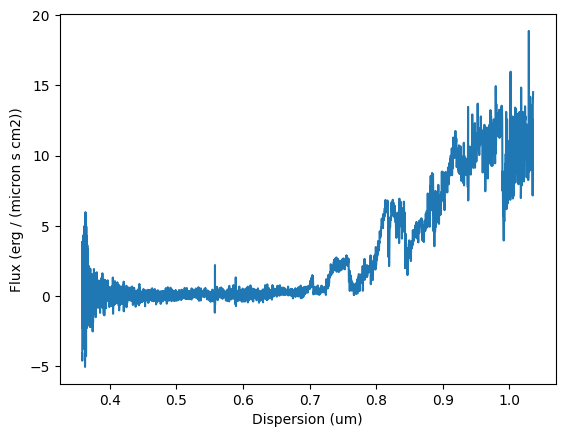

SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt is plottable.


In [26]:
# Plotting SDSS intrument test
filename = "SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt"
file_path = os.path.join(path, "sty2054_supplemental_files", filename)

try: 
    data = np.loadtxt(file_path, comments="#", encoding="latin1")

    # column1: #w         column2:flux
    wavelength = (data[:, 0] * u.AA).to(u.um)
    flux = data[:, 1] * (u.erg / (u.cm**2 * u.s * u.micron))

    # check plottability
    spectrum = Spectrum(
        spectral_axis=wavelength, 
        flux=flux,
        meta={'header': fits.Header()}
        )

    # Add metadata to spectrum header
    header = spectrum.meta['header']
    header.set('SIMPLE', True, 'Conforms to FITS standard')
    header.set('VOPUB', 'SIMPLE Archive', 'Publication of the spectrum')

    # Object name
    object_name = " ".join(filename.split("_")[:2])
    print(f"Extracted object name: {object_name}")
    header.set('OBJECT', object_name, 'Name of the observed object')
    header.set('CONTRIB1', "Guan Ying Goh", 'Contributor')

    # Query SIMBAD for coordinates
    try:
        result = Simbad.query_object(object_name)
        if result is not None and len(result) > 0:
            header.set("RA_TARG", result[0]["ra"], '[deg] RA')
            header.set("DEC_TARG", result[0]["dec"], '[deg] Dec')
    except Exception as e:
        print(f"  SIMBAD query failed for {object_name}: {e}")

    # Telescope/Instrument/Date
    header["TELESCOP"] = "SDSS"
    header["INSTRUME"] = "BOSS"
    header["DATE-OBS"] = "2012-10-24T00:00:00"
    header["BUNIT"] = str(flux.unit)
    header["DATE"] = date.today().isoformat()
    add_wavelength_keywords(header, spectrum.spectral_axis)
    add_missing_keywords(header)

    # Save FITS using specutils (automatically handles mask)
    fits_filename = filename.replace(".txt", "_SIMPLE.fits")
    fits_path = os.path.join(output_path, fits_filename)
    spectrum.write(fits_path, format='tabular-fits', overwrite=True)
    print(f"Saved {fits_filename} successfully.")
    
    if check_spectrum_plottable(spectrum, show_plot=True):
        print(f"{filename} is plottable.")


except Exception as e:
    print(f"Could not read {filename}: {e}")

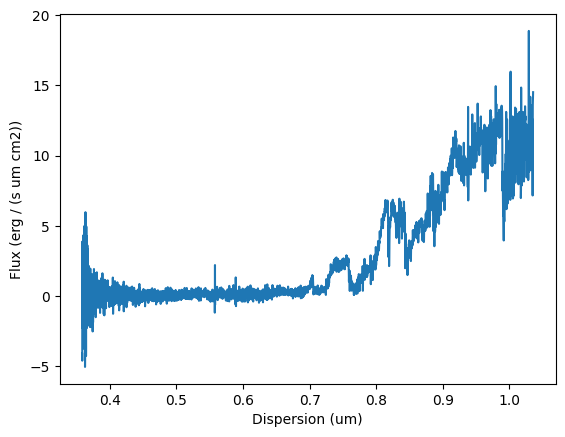

True

In [31]:
# Test saved FITS file
fits_path = os.path.join(output_path, "SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I_SIMPLE.fits")
spectrum = Spectrum.read(fits_path)
check_spectrum_plottable(spectrum, show_plot=True)


Reading FITS file: ULAS_J124425.75+102439.3_esdL0.5_IMACS_Magellan_Primeval-I.fits
   Data shape: (1870,)
   Flux unit: DU/PIXEL
   Instrument: IMACS Short-Camera
   Telescope: Baade_Mag_1
   Date of observation: 2010-05-05
   MJD-OBS: Unknown


 [astropy.io.fits.verify]


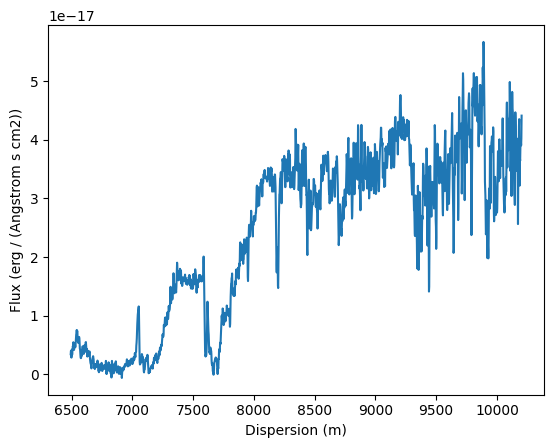

COPY AND PASTE THE FOLLOWING COMMANDS INTO YOUR SCRIPT 
Replace <value> with the appropriate value for your dataset 
If you're not sure of the correct value, use None 
If you started with a header object not called `header`, 
replace 'header' with the name of your header object 
Use the `astrodb_utils.fits.add_wavelength_keywords` function 
to add the SPEC_VAL, SPEC_BW, TDMID1, TDMAX1, and SPECBAND keywords 

header.set('RA_TARG', "<value>")
header.set('DEC_TARG', "<value>")
header.set('OBSERVAT', "<value>")
header.set('VOCLASS', "<value>")
header.set('VOREF', "<value>")
header.set('TITLE', "<value>")
header.set('AUTHOR', "<value>")
header.set('TMID', "<value>")
header.set('TELAPSE', "<value>")
header.set('APERTURE', "<value>")
Saved ULAS_J124425.75+102439.3_esdL0.5_IMACS_Magellan_Primeval-I_SIMPLE.fits successfully.


In [39]:
filename = "ULAS_J124425.75+102439.3_esdL0.5_IMACS_Magellan_Primeval-I.fits"
file_path = os.path.join(path, "sty2054_supplemental_files", filename)

try:
    with fits.open(file_path) as hdul:
        data = hdul[0].data
        header = hdul[0].header.copy()


    print(f"\nReading FITS file: {filename}")
    print("   Data shape:", data.shape)
    print("   Flux unit:", header.get('BUNIT', 'Unknown'))
    print("   Instrument:", header.get('INSTRUME', 'Unknown'))
    print("   Telescope:", header.get('TELESCOP', 'Unknown'))
    print("   Date of observation:", header.get('DATE-OBS', 'Unknown'))
    print("   MJD-OBS:", header.get('MJD-OBS', 'Unknown'))

    
    # Set flux unit to erg/s/cm2/Angstrom
    flux_unit = u.erg / u.s / u.cm**2 / u.Angstrom

    # Fix CTYPE1 to read spectral axis
    if header.get('CTYPE1') == 'LINEAR':
        header['CTYPE1'] = 'WAVE'
    
    wcs = WCS(header)
    spec = Spectrum(flux=data * flux_unit, wcs=wcs)
    check_spectrum_plottable(spec, raise_error=True, show_plot=True)

    # set header keywords
    header.set('SIMPLE', True, 'Conforms to FITS standard')
    header.set('VOPUB', 'SIMPLE Archive', 'Publication of the spectrum')
    header.set('OBJECT', "ULAS J124425.75+102439.3", 'Name of the observed object')
    header.set('CONTRIB1', "Guan Ying Goh", 'Contributor')
    header.set('DATE', date.today().isoformat())
    header.set('BUNIT', str(flux_unit))

    # make new FITS file with correct keywords
    add_wavelength_keywords(header, spec.spectral_axis)
    add_missing_keywords(header)

    # save new FITS file
    out_filename = filename.replace(".fits", "_SIMPLE.fits")
    out_path = os.path.join(output_path, out_filename)
    fits.writeto(
        out_path,
        spec.flux.value,
        header, 
        overwrite=True
    )
    print(f"Saved {out_filename} successfully.")




except Exception as e:
    print(f"Error reading {filename}: {e}") 


a floating-point value was expected. [astropy.wcs.wcs]


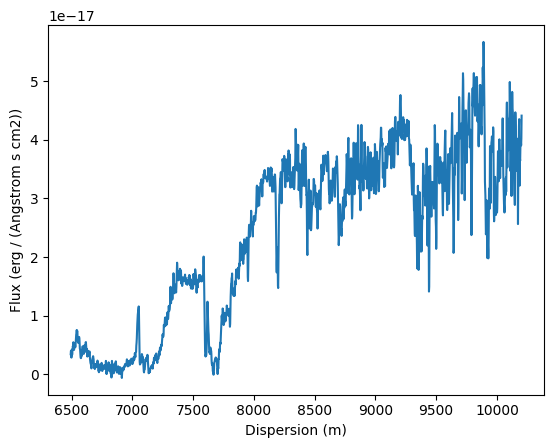

True

In [40]:
# Test ULAS_J124425.75+102439.3_esdL0.5_IMACS_Magellan_Primeval-I_SIMPLE.fits
fits_path = os.path.join(output_path, "ULAS_J124425.75+102439.3_esdL0.5_IMACS_Magellan_Primeval-I_SIMPLE.fits")
spectrum = Spectrum.read(fits_path)
check_spectrum_plottable(spectrum, show_plot=True)
